In [150]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
import warnings
warnings.filterwarnings("ignore")


In [152]:
df = pd.read_csv(r"C:\Users\TALIGENT\Downloads\bank+marketing\bank\bank-full.csv", delimiter=';')
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [153]:
categoricas= ['job', 'marital', 'education', 'housing','contact', 'month', 'poutcome', 'y']
numericas = ['age','balance', 'day', 'duration', 'campaign', 'pdays','previous']

df = df[categoricas + numericas]

In [154]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())
    print(df[col].isnull().sum())
    print(df[col].value_counts())


--- job ---
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
0
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

--- marital ---
['married' 'single' 'divorced']
0
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

--- education ---
['tertiary' 'secondary' 'unknown' 'primary']
0
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

--- housing ---
['yes' 'no']
0
housing
yes    25130
no     20081
Name: count, dtype: int64

--- contact ---
['unknown' 'cellular' 'telephone']
0
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, 

In [155]:
df.describe(include=["O"]) # Descripcion features categoricas


,job,marital,education,housing,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,3,12,4,2
top,blue-collar,married,secondary,yes,cellular,may,unknown,no
freq,9732,27214,23202,25130,29285,13766,36959,39922


In [156]:
df[numericas].describe() # Descripcion features numericas

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


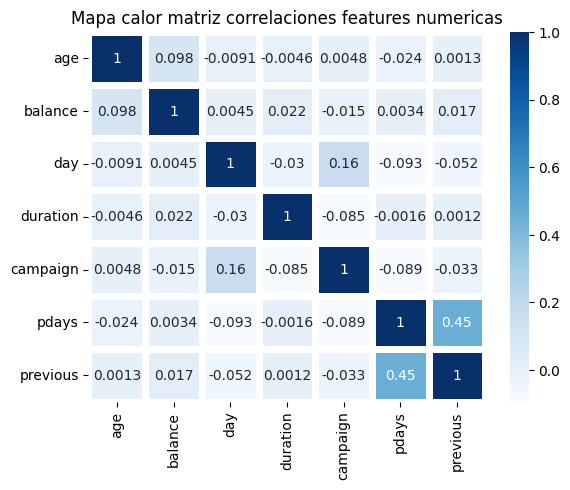

In [157]:
matrix_corr_num = df[numericas].corr

sns.heatmap(matrix_corr_num(),annot=True, linewidths=5, cmap='Blues')
plt.title('Mapa calor matriz correlaciones features numericas')
plt.show()

In [158]:
matrix_corr_num().unstack().sort_values(ascending =False) # para ver las de mas correlacion

age       age         1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
duration  duration    1.000000
pdays     pdays       1.000000
previous  previous    1.000000
pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
balance   duration    0.021560
duration  balance     0.021560
previous  balance     0.016674
balance   previous    0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

In [159]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [160]:
# Reemplazamos valores de y a binarios
df.y = (df.y == 'yes').astype(int) 

In [161]:
# Split de df con sklearn
from sklearn.model_selection import train_test_split


df_full_train, df_test= train_test_split(df,test_size=0.2, random_state= 42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state= 42)

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)
df_full_train.reset_index(drop=True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test.y
y_full_train = df_full_train.y

del df_train['y']
del df_val['y']
del df_test['y']
del df_full_train['y']

categoricas= ['job', 'marital', 'education', 'housing','contact', 'month', 'poutcome']


In [162]:
# Informacion mutua entre variables
from sklearn.metrics import mutual_info_score

def info_mutua_y(series):
    return mutual_info_score(y_train,series)

im = df_train[categoricas].apply(info_mutua_y).round(2)
im.sort_values(ascending=False)





poutcome     0.03
month        0.03
job          0.01
contact      0.01
housing      0.01
education    0.00
marital      0.00
dtype: float64

In [163]:
#Obtenemos la X

dict_train= df_train[categoricas + numericas].to_dict(orient='records')
dict_val= df_val[categoricas + numericas].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train= dv.fit_transform(dict_train)
X_val= dv.transform(dict_val)

In [189]:
# Modelo
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

score_orig = accuracy_score(y_val, y_pred)
Accuracy = np.round(score_orig,2)
Accuracy


np.float64(0.9)

In [ ]:
# Para analizar como mejora la pred si eliminamos una variable
features = df_train.columns.to_list()

scores = pd.DataFrame(columns = ['col_eliminada', 'accuracy', 'diferencia'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dict_train= df_train[subset].to_dict(orient='records')
    dict_val= df_val[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train= dv.fit_transform(dict_train)
    X_val= dv.transform(dict_val)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, score_orig - score]

scores

,col_eliminada,accuracy,diferencia
0,job,0.901128,0.000000
1,marital,0.901128,0.000000
2,education,0.900907,0.000221
3,housing,0.901239,-0.000111
4,contact,0.900022,0.001106
5,month,0.899912,0.001217
6,poutcome,0.893608,0.007520
7,age,0.901017,0.000111
8,balance,0.900686,0.000442
9,day,0.901349,-0.000221


In [ ]:
# Probamos con varios parametros en C para evitar el overfitting y obetnemos el mejor
dict_train= df_train[categoricas + numericas].to_dict(orient='records')
dict_val= df_val[categoricas + numericas].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train= dv.fit_transform(dict_train)
X_val= dv.transform(dict_val)

C= [0.01, 0.1, 1, 10, 100]
for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    score_orig = accuracy_score(y_val, y_pred)
    Accuracy = np.round(score_orig,2)
    print(f'C = {c}:\t Score = {score_orig}\t Accuracy = {Accuracy}')


C = 0.01:	 Score = 0.8980314089803141	 Accuracy = 0.9
C = 0.1:	 Score = 0.9009068790090687	 Accuracy = 0.9
C = 1:	 Score = 0.9010174740101747	 Accuracy = 0.9
C = 10:	 Score = 0.9010174740101747	 Accuracy = 0.9
C = 100:	 Score = 0.9011280690112807	 Accuracy = 0.9
